# Parlons peu, parlons modélisations graphiques
\
Devant le franc succès des merging du notebook précédent, essayons à présent de modéliser graphiquement des données météorologiques.

Pour ce faire, on va s'intéresser à la table **weather**, puisqu'elle contient à elle seule toutes les informations utiles à l'étude météorologique des 4 villes de Paris, Vienne, Berlin et Bruxelles.

Dans un premier temps, réimportons tous les modules et les dataframes (le merging du notebook 02 n'étant pas concluant, on ne va pas l'utiliser ici) :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_weather = pd.read_csv('data/daily-weather-cities.csv')
dF_cities = pd.read_csv('data/cities.csv')
df_countries = pd.read_csv('data/countries.csv')

In [3]:
df_weather

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,11035,Vienna,1855-02-01,Winter,NaN,-8.5,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11035,Vienna,1855-02-02,Winter,NaN,-12.1,-3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11035,Vienna,1855-02-03,Winter,NaN,-17.5,-8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11035,Vienna,1855-02-04,Winter,NaN,-11.4,-6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11035,Vienna,1855-02-05,Winter,NaN,-7.5,-1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193114,10384,Berlin,2023-08-30,Summer,15.6,11.9,19.7,NaN,NaN,239.0,9.8,24.1,1010.8,NaN
193115,10384,Berlin,2023-08-31,Summer,16.2,12.0,21.1,NaN,NaN,203.0,10.4,25.9,1012.1,NaN
193116,10384,Berlin,2023-09-01,Autumn,16.7,12.2,21.7,NaN,NaN,190.0,11.0,27.8,1015.5,NaN
193117,10384,Berlin,2023-09-02,Autumn,17.6,13.3,22.5,NaN,NaN,226.0,11.7,27.8,1017.5,NaN


In [4]:
#conversion de la colonne temporelle
df_weather['date'] = pd.to_datetime(df_weather['date'])

# Analyse descriptive

Commençons par faire des statistiques basiques par ville, en moyenne annuelle : température moyenne, précipitations totales, ensoleillement, neige, température maximale et minimale. Pour cela, on crée des sous-tables de **weather** pour chaque ville.

In [5]:
weather_p = df_weather[df_weather['city_name'] == 'Paris']
weather_v = df_weather[df_weather['city_name'] == 'Vienna']
weather_ber = df_weather[df_weather['city_name'] == 'Berlin']
weather_bxl = df_weather[df_weather['city_name'] == 'Brussels']

In [6]:
weather_p['year'] = weather_p['date'].dt.year
weather_v['year'] = weather_v['date'].dt.year
weather_ber['year'] = weather_ber['date'].dt.year
weather_bxl['year'] = weather_bxl['date'].dt.year

stats_annuelles_p = weather_p.groupby(['year']).agg({
    'avg_temp_c': 'mean',
    'min_temp_c': 'min',
    'max_temp_c':'max',
    'precipitation_mm': 'sum',
    'snow_depth_mm': 'sum',
    'sunshine_total_min': 'sum'})

stats_annuelles_v = weather_v.groupby(['year']).agg({
    'avg_temp_c': 'mean',
    'min_temp_c': 'min',
    'max_temp_c':'max',
    'precipitation_mm': 'sum',
    'snow_depth_mm': 'sum',
    'sunshine_total_min': 'sum'})

stats_annuelles_ber = weather_ber.groupby(['year']).agg({
    'avg_temp_c': 'mean',
    'min_temp_c': 'min',
    'max_temp_c':'max',
    'precipitation_mm': 'sum',
    'snow_depth_mm': 'sum',
    'sunshine_total_min': 'sum'})

stats_annuelles_bxl = weather_bxl.groupby(['year']).agg({
    'avg_temp_c': 'mean',
    'min_temp_c': 'min',
    'max_temp_c':'max',
    'precipitation_mm': 'sum',
    'snow_depth_mm': 'sum',
    'sunshine_total_min': 'sum'})

/var/folders/2s/mnm_jr6n695c5mgb2ggznhjw0000gn/T/ipykernel_22153/3430724143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_p['year'] = weather_p['date'].dt.year
/var/folders/2s/mnm_jr6n695c5mgb2ggznhjw0000gn/T/ipykernel_22153/3430724143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_v['year'] = weather_v['date'].dt.year
/var/folders/2s/mnm_jr6n695c5mgb2ggznhjw0000gn/T/ipykernel_22153/3430724143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [7]:
stats_annuelles_p

,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,sunshine_total_min
year,,,,,,
1921,NaN,-9.6,38.0,277.6,0.0,0.0
1922,NaN,-9.1,35.0,749.8,0.0,0.0
1923,NaN,-5.5,39.0,693.8,0.0,0.0
1924,NaN,-6.4,29.6,244.5,0.0,0.0
1944,7.018478,-6.5,16.3,0.0,0.0,0.0
...,...,...,...,...,...,...
2019,12.843836,-4.0,41.9,633.9,90.0,0.0
2020,13.477322,-2.6,39.5,627.1,0.0,0.0
2021,12.022192,-5.7,33.2,572.8,70.0,0.0


In [8]:
stats_annuelles_v

,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,sunshine_total_min
year,,,,,,
1855,NaN,-19.0,34.8,0.0,0.0,0.0
1856,NaN,-14.1,34.8,0.0,0.0,0.0
1857,NaN,-15.3,37.0,0.0,0.0,0.0
1858,NaN,-16.9,34.3,0.0,0.0,0.0
1859,NaN,-14.1,37.3,0.0,0.0,0.0
...,...,...,...,...,...,...
2019,12.555890,-8.2,37.0,674.3,420.0,0.0
2020,11.918306,-4.7,35.9,698.5,50.0,0.0
2021,11.251781,-8.4,36.7,580.2,1201.0,0.0


In [9]:
stats_annuelles_ber

,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,sunshine_total_min
year,,,,,,
1931,9.047175,-11.1,32.2,591.4,0.0,0.0
1932,9.761749,-13.9,36.1,415.9,0.0,0.0
1933,8.987187,-17.2,35.0,386.2,0.0,0.0
1934,10.915890,-11.1,30.0,277.4,0.0,0.0
1935,9.454945,-12.8,32.8,564.6,0.0,0.0
...,...,...,...,...,...,...
2019,11.824384,-6.9,38.5,540.8,0.0,112146.0
2020,11.728415,-4.6,36.4,478.8,0.0,113046.0
2021,10.493699,-12.5,36.6,532.4,0.0,95403.0


In [10]:
stats_annuelles_bxl

,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,sunshine_total_min
year,,,,,,
1833,NaN,-10.3,28.2,0.0,0.0,0.0
1834,NaN,-4.8,32.9,0.0,0.0,0.0
1835,NaN,-11.3,29.8,0.0,0.0,0.0
1836,NaN,-12.2,29.9,0.0,0.0,0.0
1837,NaN,-7.1,29.8,0.0,0.0,0.0
...,...,...,...,...,...,...
2019,11.543014,-4.6,39.7,545.1,0.0,0.0
2020,12.157377,-2.4,36.5,688.0,0.0,0.0
2021,10.729315,-8.6,29.6,988.4,121.0,0.0


Traçons maintenant les tendances pour chaque ville et paramètres graphiquement : pour les températures on peut faire un graphique avec une courbe de fonction puisque les données s'y prêtent bien.

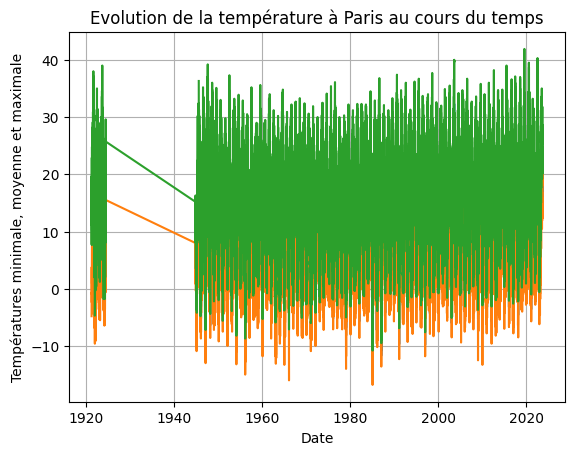

In [11]:
plt.plot(weather_p['date'], weather_p['avg_temp_c'], label='Température moyenne')
plt.plot(weather_p['date'], weather_p['min_temp_c'], label='Température minimale')
plt.plot(weather_p['date'], weather_p['max_temp_c'], label='Température maximale')

plt.title('Evolution de la température à Paris au cours du temps')
plt.xlabel('Date')
plt.ylabel('Températures minimale, moyenne et maximale')
plt.grid(True)
plt.show()

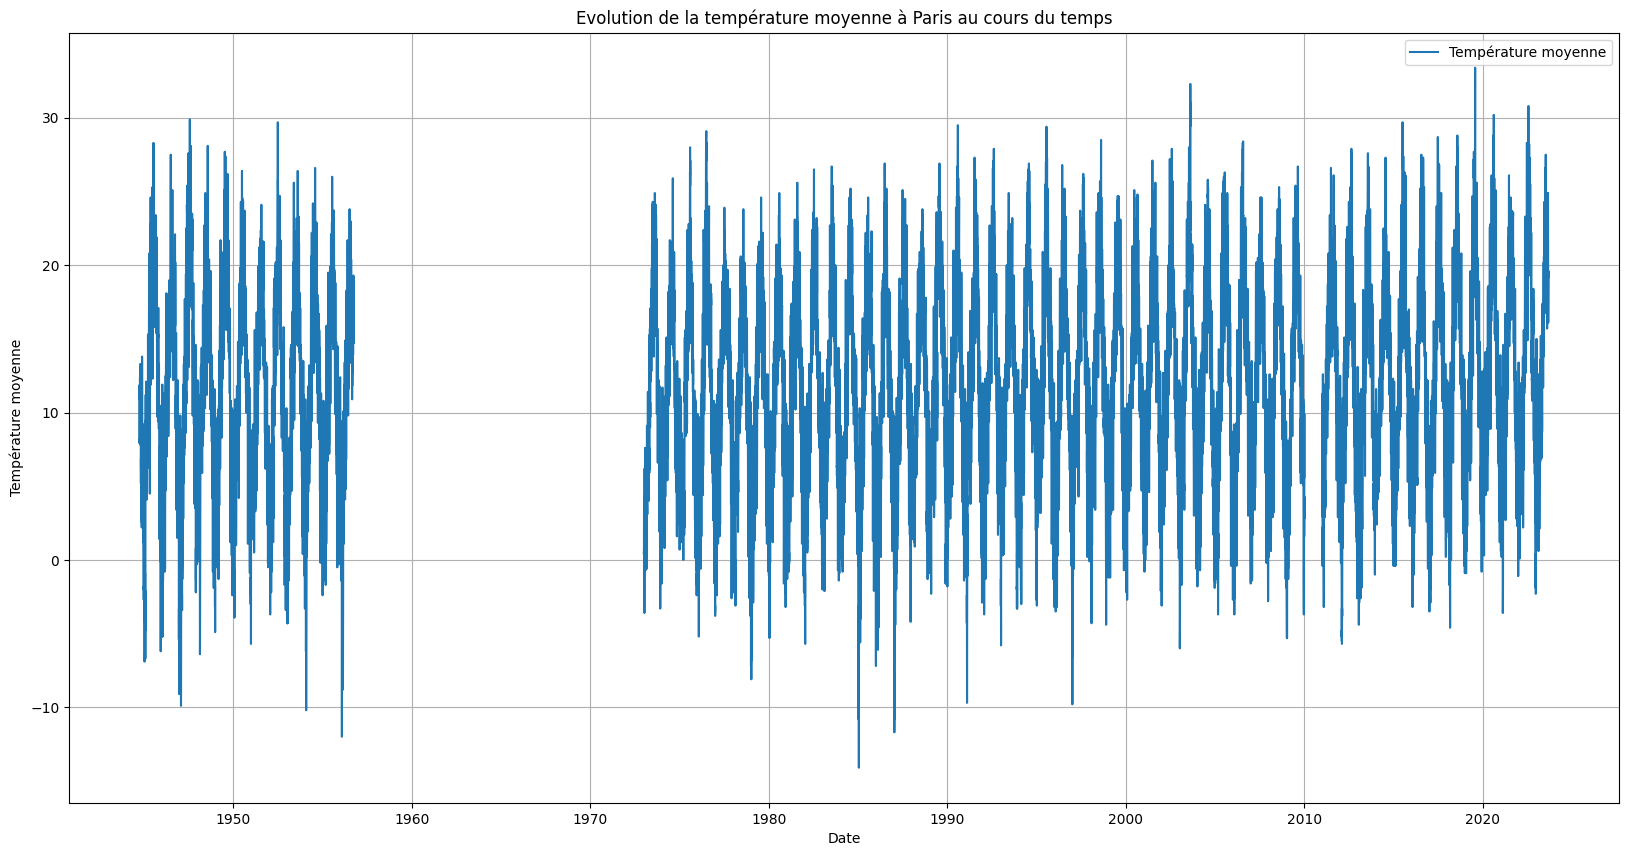

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(weather_p['date'], weather_p['avg_temp_c'], label='Température moyenne')
plt.legend()
plt.title('Evolution de la température moyenne à Paris au cours du temps')
plt.xlabel('Date')
plt.ylabel('Température moyenne')
plt.grid(True)
plt.show()

Les variations périodiques observées sont dues au cycle des saisons.

On va tenter de visualiser d'une meilleure manière le graphique d'évolution comparée des températures moyennes par ville en moyennant sur chaque année et effacer les grosses variations dûes aux saisons.

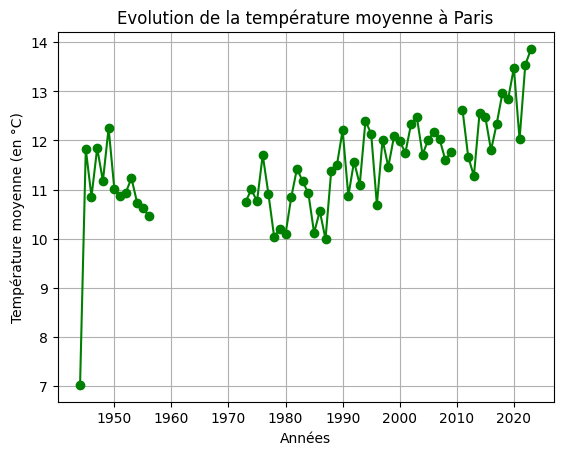

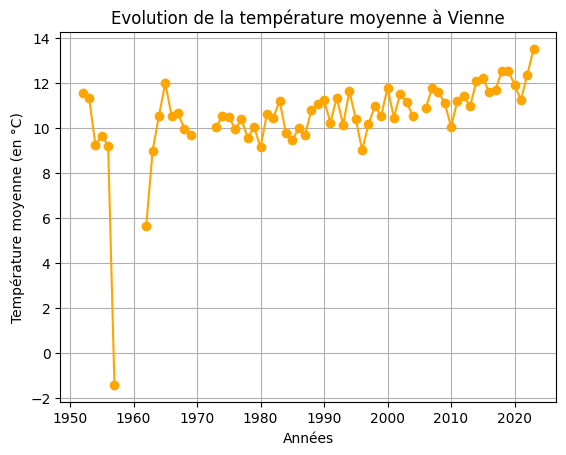

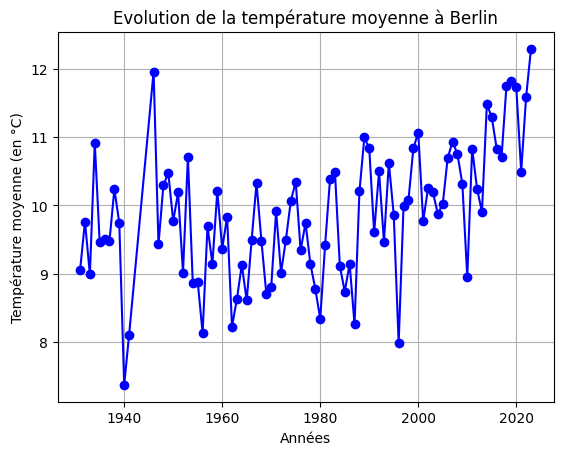

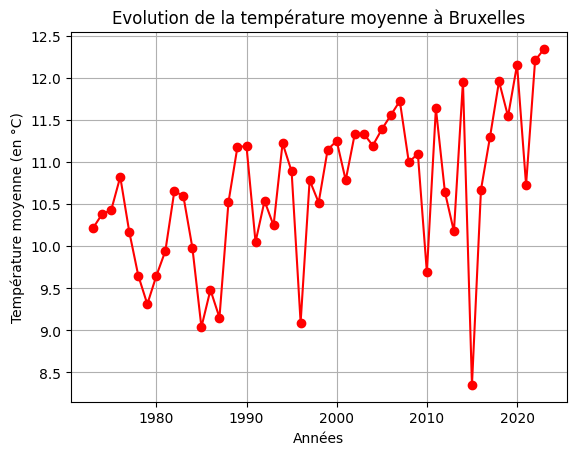

In [13]:
temp_moy_ann_p = weather_p.groupby('year')['avg_temp_c'].mean()
temp_moy_ann_v = weather_v.groupby('year')['avg_temp_c'].mean()
temp_moy_ann_ber = weather_ber.groupby('year')['avg_temp_c'].mean()
temp_moy_ann_bxl = weather_bxl.groupby('year')['avg_temp_c'].mean()

#On ne va pas pouvoir afficher tout sur le même graphique car les années ne coïncideront pas assez
plt.plot(weather_p['year'].unique(), temp_moy_ann_p, marker='o', color='green')
plt.xlabel('Années')
plt.ylabel('Température moyenne (en °C)')
plt.title('Evolution de la température moyenne à Paris')
plt.grid(True)
plt.show()

plt.plot(weather_v['year'].unique(), temp_moy_ann_v, marker='o', color='orange')
plt.xlabel('Années')
plt.ylabel('Température moyenne (en °C)')
plt.title('Evolution de la température moyenne à Vienne')
plt.grid(True)
plt.show()

plt.plot(weather_ber['year'].unique(), temp_moy_ann_ber, marker='o', color='blue')
plt.xlabel('Années')
plt.ylabel('Température moyenne (en °C)')
plt.title('Evolution de la température moyenne à Berlin')
plt.grid(True)
plt.show()

plt.plot(weather_bxl['year'].unique(), temp_moy_ann_bxl, marker='o', color='red')
plt.xlabel('Années')
plt.ylabel('Température moyenne (en °C)')
plt.title('Evolution de la température moyenne à Bruxelles')
plt.grid(True)
plt.show()

On constate une hausse globale des températures ; les fortes variations ponctuelles de températures moyennes (par rapport à la tendance quasi affine sur tous les graphes) peut s'expliquer par des données trop concentrées sur une certaine période de l'année, ce qui a une forte influence sur le calcul de la température moyenne annuelle.

Pour étudier une variation plus spécifique des températures avec le temps, on va se concentrer sur plusieurs années ciblées, par exemple 1950, 1980, 2000 et 2020, et comparer leur profil mensuel. Ici on ne s'intéresse qu'à Paris mais c'est valable pour les autres villes aussi.

In [14]:
weather_p1950 = weather_p[weather_p['year'] == 1950].copy()
weather_p1980 = weather_p[weather_p['year'] == 1980].copy()
weather_p2000 = weather_p[weather_p['year'] == 2000].copy()
weather_p2020 = weather_p[weather_p['year'] == 2020].copy()

In [15]:
temp_moy_mensp50 = weather_p1950.groupby(weather_p1950['date'].dt.month)['avg_temp_c'].mean()
temp_moy_mensp80 = weather_p1980.groupby(weather_p1980['date'].dt.month)['avg_temp_c'].mean()
temp_moy_mensp00 = weather_p2000.groupby(weather_p2000['date'].dt.month)['avg_temp_c'].mean()
temp_moy_mensp20 = weather_p2020.groupby(weather_p2020['date'].dt.month)['avg_temp_c'].mean()

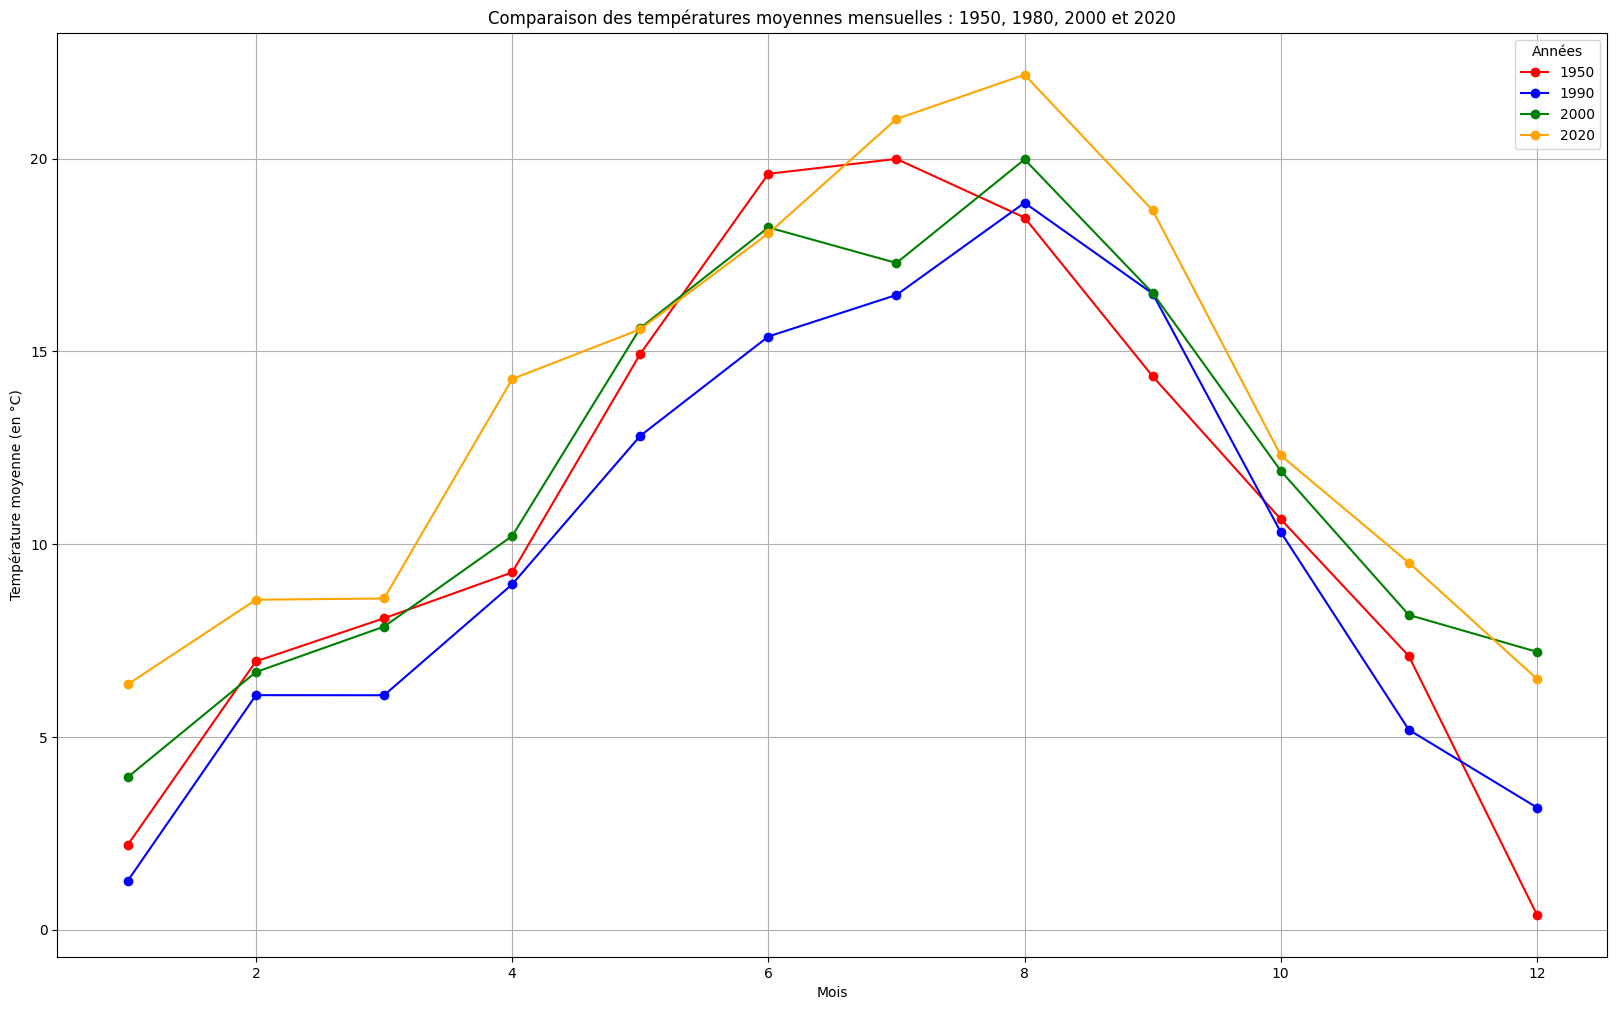

In [16]:
plt.figure(figsize=(20, 12))
plt.plot(temp_moy_mensp50.index, temp_moy_mensp50.values, label='1950', color='red', marker='o')
plt.plot(temp_moy_mensp80.index, temp_moy_mensp80.values, label='1990', color='blue', marker='o')
plt.plot(temp_moy_mensp00.index, temp_moy_mensp00.values, label='2000', color='green', marker='o')
plt.plot(temp_moy_mensp20.index, temp_moy_mensp20.values, label='2020', color='orange', marker='o')
plt.title('Comparaison des températures moyennes mensuelles : 1950, 1980, 2000 et 2020')
plt.xlabel('Mois')
plt.ylabel('Température moyenne (en °C)')
plt.legend(title='Années')
plt.grid(True)
plt.show()

On remarque que l'année 2020 est globalement plus chaude que les autres ; bien que 1950 soit globalement au milieu du fuseau créé par les courbes, on observe une hiérarchie dans les températures moyennes entre 1980 et 2020.

Affichons les différences de températures à Paris entre 1980 et 2020.

Text(0, 0.5, 'Différence de température moyenne (en °C)')

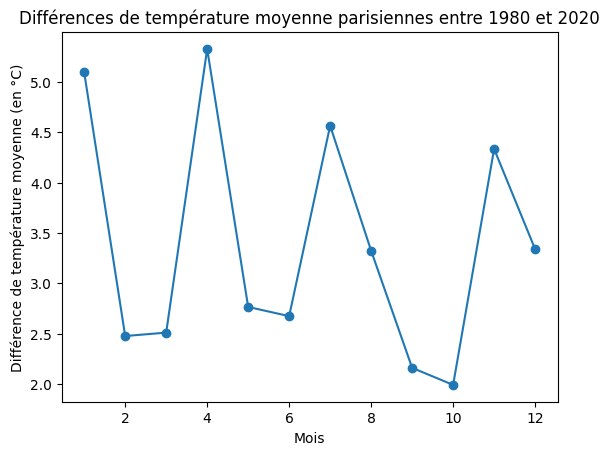

In [17]:
plt.plot(temp_moy_mensp20 - temp_moy_mensp80, marker='o')
plt.title("Différences de température moyenne parisiennes entre 1980 et 2020")
plt.xlabel("Mois")
plt.ylabel("Différence de température moyenne (en °C)")

On observe donc un écart de températures d'au moins 2°C entre le Paris de 1980 et celui de 2020.

Pour terminer cette étude sur les températures, on peut se demander les moments de franchissement de seuils, par exemple les jours de fortes chaleurs (Tmax > 30°C) ou de grand froid (Tmin < 0°C) dans les différentes villes.

Pour cela, on va afficher des histogrammes du nombre de jours chauds/froids par ville et par an.

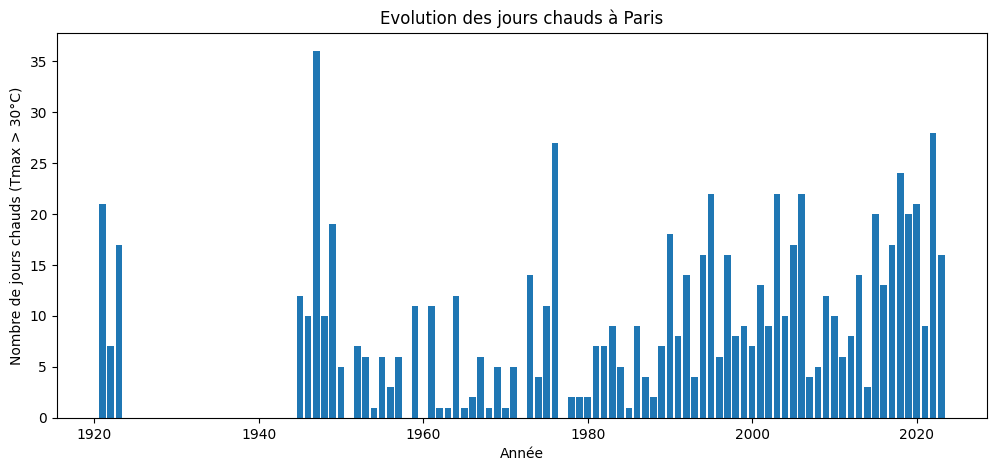

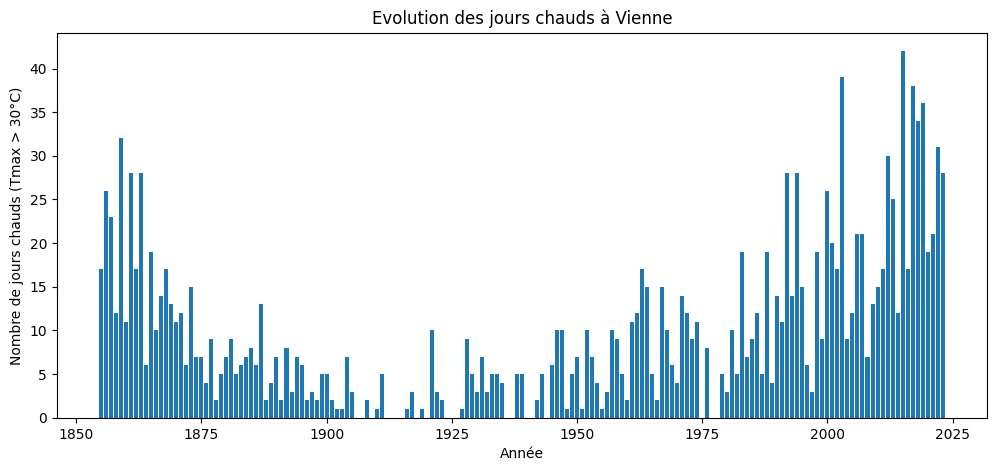

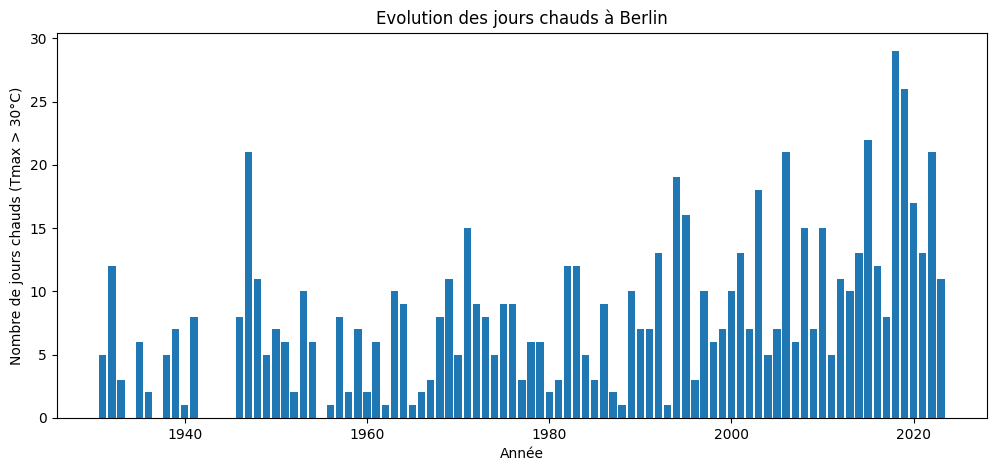

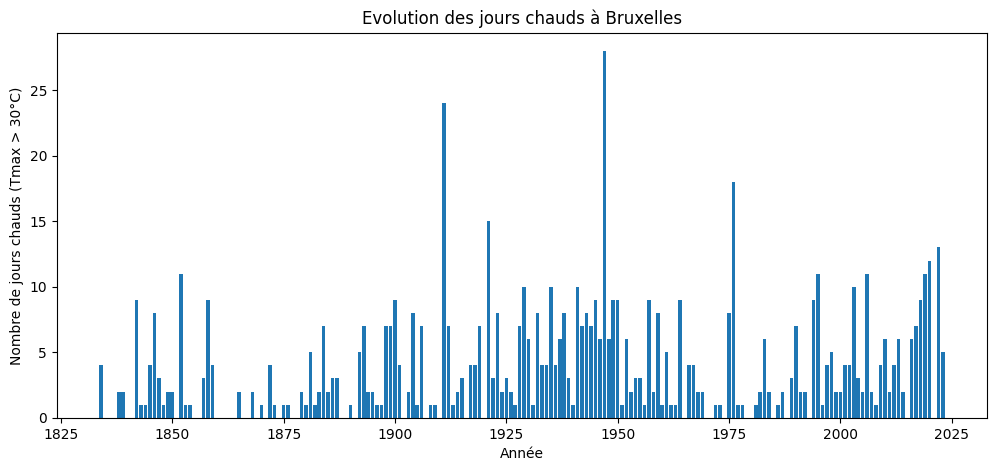

In [18]:
#jours de fortes chaleurs
chaleur_p = weather_p[weather_p['max_temp_c'] > 30].groupby('year').size()
chaleur_v = weather_v[weather_v['max_temp_c'] > 30].groupby('year').size()
chaleur_ber = weather_ber[weather_ber['max_temp_c'] > 30].groupby('year').size()
chaleur_bxl = weather_bxl[weather_bxl['max_temp_c'] > 30].groupby('year').size()

plt.figure(figsize=(12, 5))
plt.bar(chaleur_p.index, chaleur_p[chaleur_p.index])
plt.title('Evolution des jours chauds à Paris')
plt.xlabel('Année')
plt.ylabel('Nombre de jours chauds (Tmax > 30°C)')
plt.show()

plt.figure(figsize=(12,5))
plt.bar(chaleur_v.index, chaleur_v[chaleur_v.index])
plt.title('Evolution des jours chauds à Vienne')
plt.xlabel('Année')
plt.ylabel('Nombre de jours chauds (Tmax > 30°C)')
plt.show()

plt.figure(figsize=(12,5))
plt.bar(chaleur_ber.index, chaleur_ber[chaleur_ber.index])
plt.title('Evolution des jours chauds à Berlin')
plt.xlabel('Année')
plt.ylabel('Nombre de jours chauds (Tmax > 30°C)')
plt.show()

plt.figure(figsize=(12,5))
plt.bar(chaleur_bxl.index, chaleur_bxl[chaleur_bxl.index])
plt.title('Evolution des jours chauds à Bruxelles')
plt.xlabel('Année')
plt.ylabel('Nombre de jours chauds (Tmax > 30°C)')
plt.show()

La tendance est difficile à déceler ; on aperçoit tout de même un profil récurrent pour les 4 villes, globalement entre 1950 et aujourd'hui on a vu un profil des fortes chaleurs "en cloche": le nombre de jours de fortes chaleurs diminue entre 1950 et 1975-80 puis remonte jusqu'à aujourd'hui.

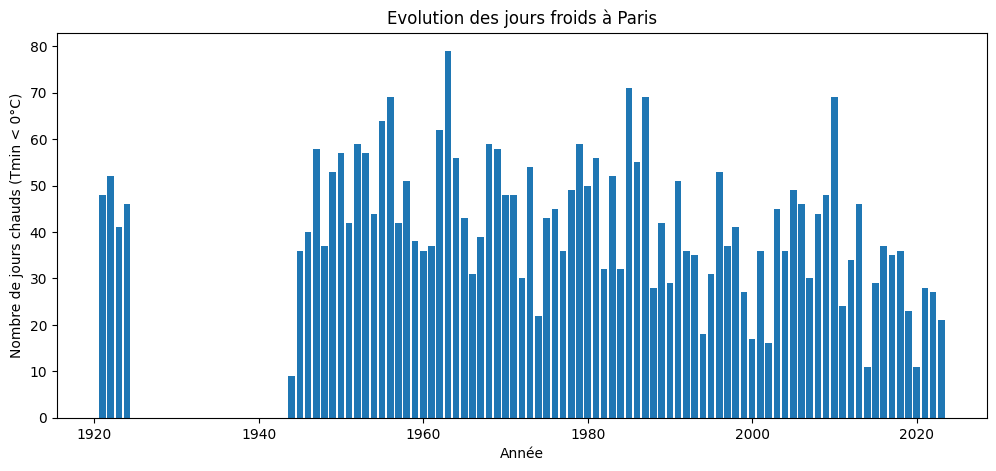

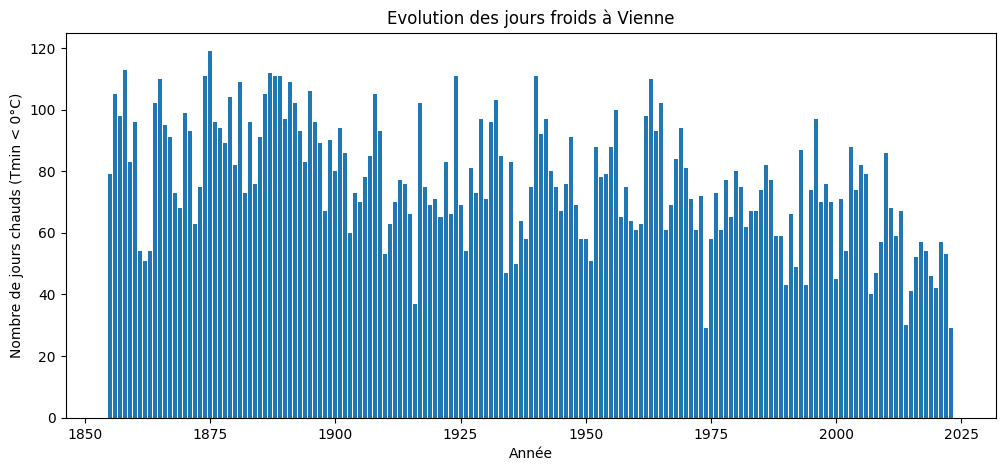

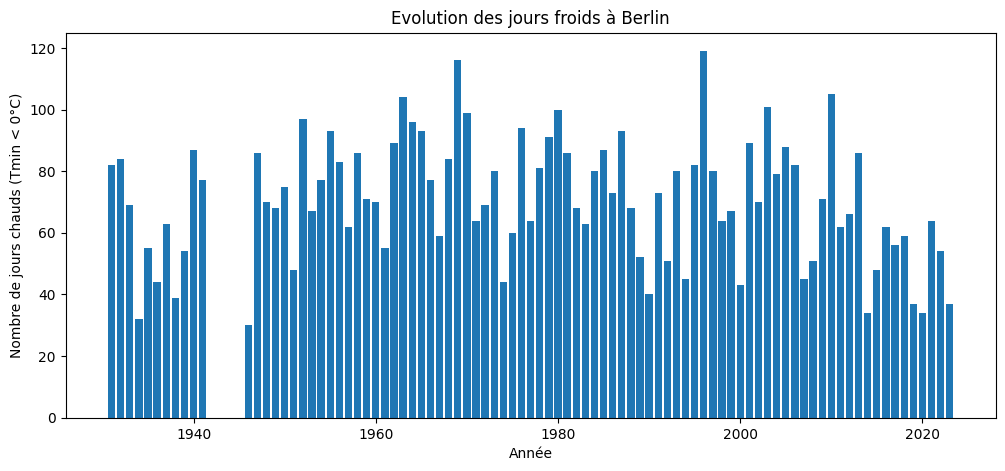

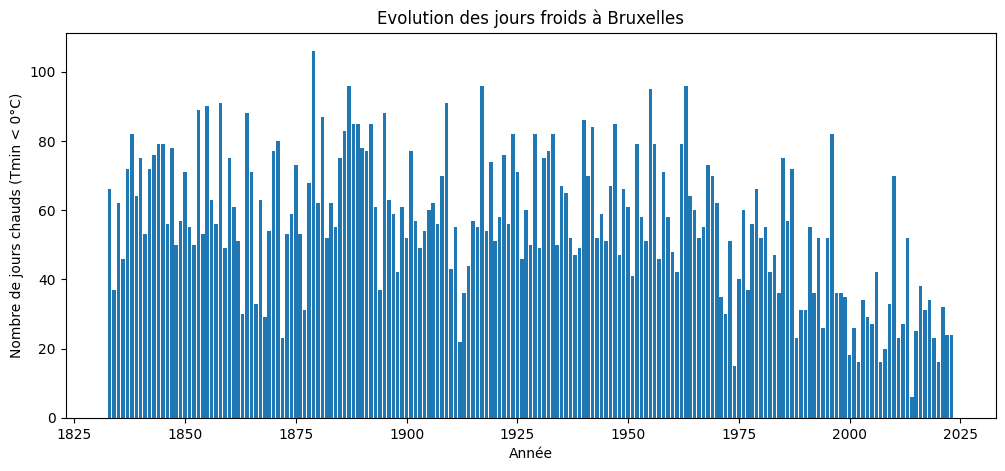

In [19]:
#jours de grand froid
froid_p = weather_p[weather_p['min_temp_c'] < 0].groupby('year').size()
froid_v = weather_v[weather_v['min_temp_c'] < 0].groupby('year').size()
froid_ber = weather_ber[weather_ber['min_temp_c'] < 0].groupby('year').size()
froid_bxl = weather_bxl[weather_bxl['min_temp_c'] < 0].groupby('year').size()

plt.figure(figsize=(12, 5))
plt.bar(froid_p.index, froid_p[froid_p.index])
plt.title('Evolution des jours froids à Paris')
plt.xlabel('Année')
plt.ylabel('Nombre de jours chauds (Tmin < 0°C)')
plt.show()

plt.figure(figsize=(12, 5))
plt.bar(froid_v.index, froid_v[froid_v.index])
plt.title('Evolution des jours froids à Vienne')
plt.xlabel('Année')
plt.ylabel('Nombre de jours chauds (Tmin < 0°C)')
plt.show()

plt.figure(figsize=(12, 5))
plt.bar(froid_ber.index, froid_ber[froid_ber.index])
plt.title('Evolution des jours froids à Berlin')
plt.xlabel('Année')
plt.ylabel('Nombre de jours chauds (Tmin < 0°C)')
plt.show()

plt.figure(figsize=(12, 5))
plt.bar(froid_bxl.index, froid_bxl[froid_bxl.index])
plt.title('Evolution des jours froids à Bruxelles')
plt.xlabel('Année')
plt.ylabel('Nombre de jours chauds (Tmin < 0°C)')
plt.show()

Ici, on voit assez bien que pour les 4 villes on voit de moins en moins de jours de grand froid avec le temps.

Gardons néanmoins en tête que la comparaison entre villes et même entre années pour une même ville n'est pas optimale car on ne possède pas le même nombre de pointages météo entre les villes et d'une année sur l'autre ; le bruit associé au nombre de pointages entache donc les résultats de nos modélisations graphiques de manière non négligeable.

Enfin, pour étudier les températures, enneigement et vents conjointement, on peut créer une matrice de corrélation entre les différents paramètres pour voir s'ils sont interdépendants

Pour pouvoir afficher la matrice de corrélation, on a besoin de se débarrasser des NaN du tableau **weather** : pour cela, on supprime les lignes qui possèdent des valeurs manquantes.

In [20]:
weather_filtre = df_weather[['avg_temp_c', 'precipitation_mm', 'avg_wind_speed_kmh', 'sunshine_total_min', 'avg_sea_level_pres_hpa']].dropna()

Maintenant, pour afficher graphiquement et joliment une matrice de corrélation et pas simplement une matrice type numpy de flottants entre -1 et 1, on emploie le module *seaborn* qui va nous renvoyer une jolie *heatmap* :

In [21]:
import seaborn as sns

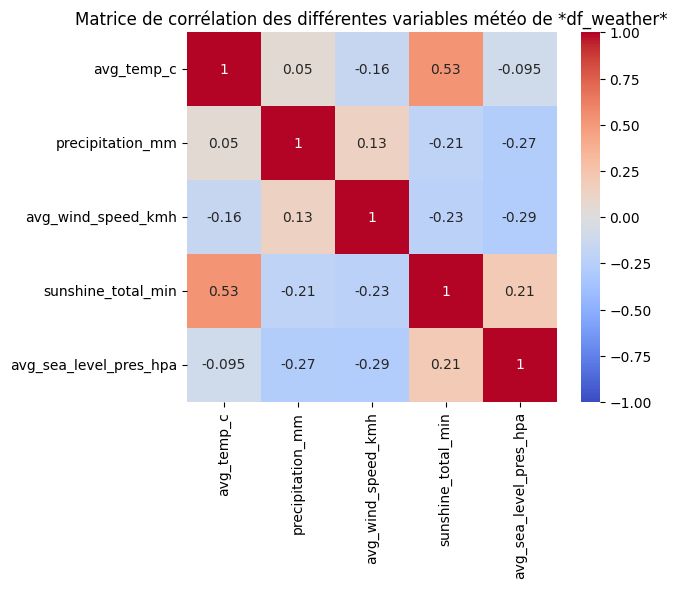

In [22]:
mat_corr = weather_filtre.corr() #matrice de corrélation
plt.figure()
sns.heatmap(mat_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title('Matrice de corrélation des différentes variables météo de *df_weather*')
plt.show()

Plus la valeur de corrélation est proche de 1, plus les 2 variables sont corrélées positivement ; à l'inverse une valeur proche de -1 correspond à deux variables plutôt décorrélées.

On remarque que ce sont surtout l'ensoleillement et la température qui présentent la plus forte corrélation. Cette corrélation semble relativement logique.
Vient ensuite, dans une moindre mesure, une légère corrrélation entre l'ensoleillement et la pression atmosphérique moyenne : cette corrélation est un peu plus difficile à expliquer puisqu'aucune des 4 villes ne se trouve sur un littoral (à plus forte pression atmosphérique car bas en altitude) connu pour son fort taux d'ensoleillement à l'année...